# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather?q='

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}{city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | genhe
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | igarka
Processing Record 4 of Set 1 | port-aux-francais
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | egilsstadir
Processing Record 7 of Set 1 | puerto baquerizo moreno
Processing Record 8 of Set 1 | taiohae
City not found. Skipping...
Processing Record 9 of Set 1 | velikiy ustyug
Processing Record 10 of Set 1 | sosnovo
Processing Record 11 of Set 1 | ceerigaabo
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | invercargill
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | saint-leu
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | sao gabriel da cachoeira
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
Lng           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,genhe,50.7833,121.5167,9.00,90,100,1.39,CN,1684976304
1,edinburgh of the seven seas,-37.0676,-12.3116,14.84,70,92,12.30,SH,1684976256
2,igarka,67.4667,86.5833,1.22,78,93,2.81,RU,1684976006
3,port-aux-francais,-49.3500,70.2167,6.10,99,100,6.52,TF,1684976241
4,badger,64.8000,-147.5333,21.40,35,100,4.12,US,1684976264


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,genhe,50.7833,121.5167,9.00,90,100,1.39,CN,1684976304
1,edinburgh of the seven seas,-37.0676,-12.3116,14.84,70,92,12.30,SH,1684976256
2,igarka,67.4667,86.5833,1.22,78,93,2.81,RU,1684976006
3,port-aux-francais,-49.3500,70.2167,6.10,99,100,6.52,TF,1684976241
4,badger,64.8000,-147.5333,21.40,35,100,4.12,US,1684976264


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

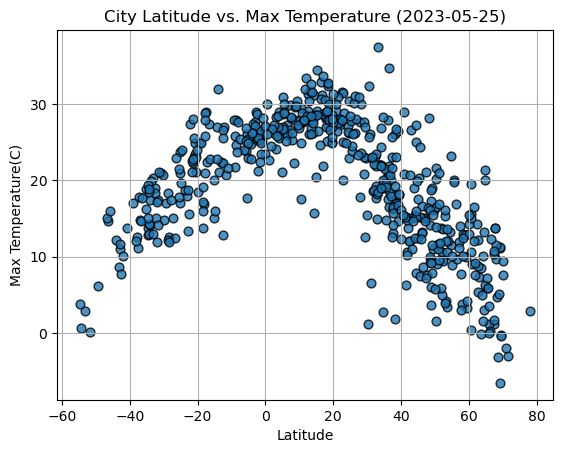

In [8]:
#Set date of extraction of data
date = time.strftime("%Y-%m-%d",time.gmtime(city_data_df['Date'].mean()))

# Build scatter plot for latitude vs. temperature
city_data_df.plot('Lat','Max Temp', kind = 'scatter', 
                  title = f'City Latitude vs. Max Temperature ({date})',
                  xlabel='Latitude',ylabel='Max Temperature(C)',
                  grid = True, edgecolor = 'black', s = 40,
                  alpha = 0.8)

# Incorporate the other graph properties
#Done above

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

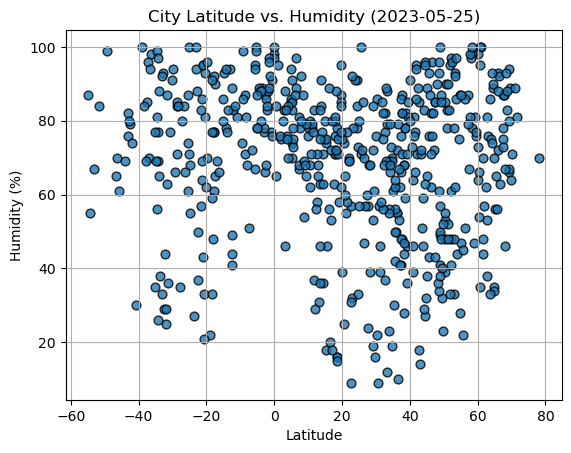

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot('Lat','Humidity', kind = 'scatter', 
                  title = f'City Latitude vs. Humidity ({date})',
                  xlabel='Latitude',ylabel='Humidity (%)',
                  grid = True, edgecolor = 'black', s = 40,
                  alpha = 0.8)

# Incorporate the other graph properties
#Done above

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

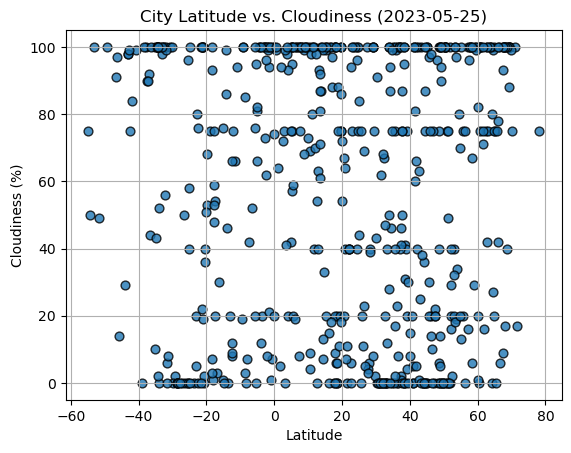

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot('Lat','Cloudiness', kind = 'scatter', 
                  title = f'City Latitude vs. Cloudiness ({date})',
                  xlabel='Latitude',ylabel='Cloudiness (%)',
                  grid = True, edgecolor = 'black', s = 40,
                  alpha = 0.8)

# Incorporate the other graph properties
# Done above

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

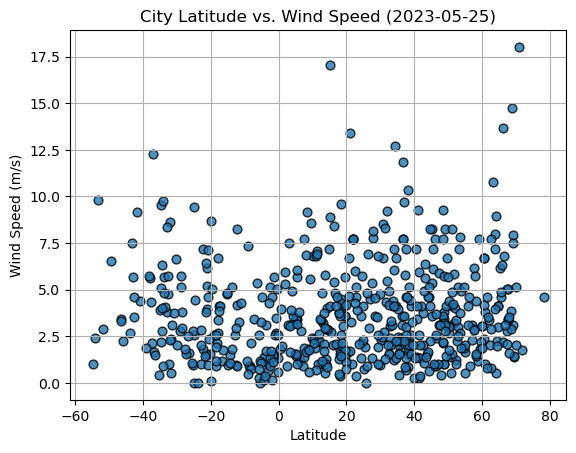

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot('Lat','Wind Speed', kind = 'scatter', 
                  title = f'City Latitude vs. Wind Speed ({date})',
                  xlabel='Latitude',ylabel='Wind Speed (m/s)',
                  grid = True, edgecolor = 'black', s = 40,
                  alpha = 0.8)

# Incorporate the other graph properties
# Done above

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, ylabel, ax, ay):
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    yline = slope * x + intercept
    print(f'The r-value is: {r_value}')

    #make scatter plot
    plt.scatter(x, y)
    plt.plot(x, yline, color = 'red')
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    equation = f'y = {round(slope,2)}x + {round(intercept,2)}'
    plt.annotate(equation , (ax, ay), color = 'r', fontsize = 15)


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,genhe,50.7833,121.5167,9.00,90,100,1.39,CN,1684976304
2,igarka,67.4667,86.5833,1.22,78,93,2.81,RU,1684976006
4,badger,64.8000,-147.5333,21.40,35,100,4.12,US,1684976264
5,egilsstadir,65.2653,-14.3948,5.95,56,75,6.17,IS,1684976061
7,velikiy ustyug,60.7644,46.3106,15.56,95,100,3.79,RU,1684976305


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,edinburgh of the seven seas,-37.0676,-12.3116,14.84,70,92,12.30,SH,1684976256
3,port-aux-francais,-49.3500,70.2167,6.10,99,100,6.52,TF,1684976241
6,puerto baquerizo moreno,-0.9000,-89.6000,25.10,77,1,3.47,EC,1684976305
11,adamstown,-25.0660,-130.1015,23.71,71,58,2.57,PN,1684976250
12,invercargill,-46.4000,168.3500,14.70,70,97,3.45,NZ,1684975925


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8161228600308371


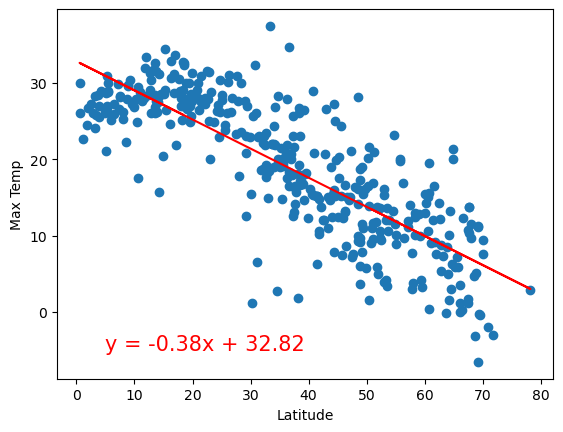

In [15]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'], 'Max Temp', 5, -5)
#other parameters for plot
plt.show()

The r-value is: 0.8069075669158865


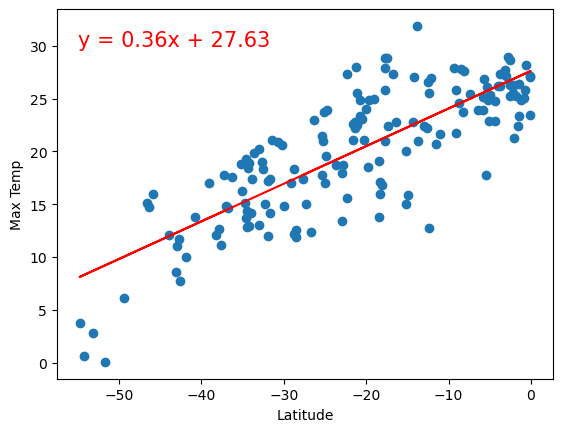

In [16]:
# Linear regression on Northern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],'Max Temp',-55,30)
#other parameters for plot
plt.show()

**Discussion about the linear relationship:** 

The distance from the equator is correlated to the Max Temperature a city gets. The r-value is around 0.8 for both hemispheres which shows that the correlation is pretty strong.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02179708974470144


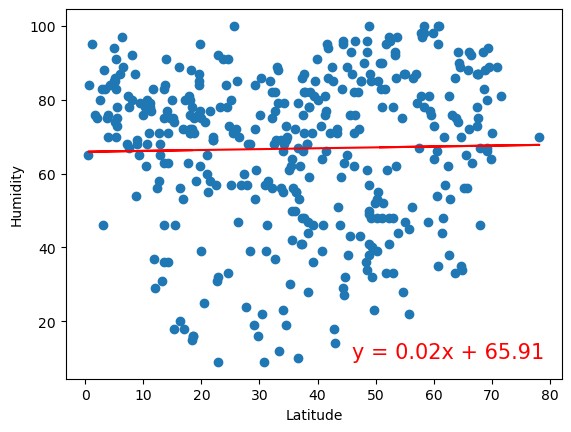

In [17]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Humidity'],'Humidity', 46,10)
#other parameters for plot
plt.show()

The r-value is: 0.22460394393774036


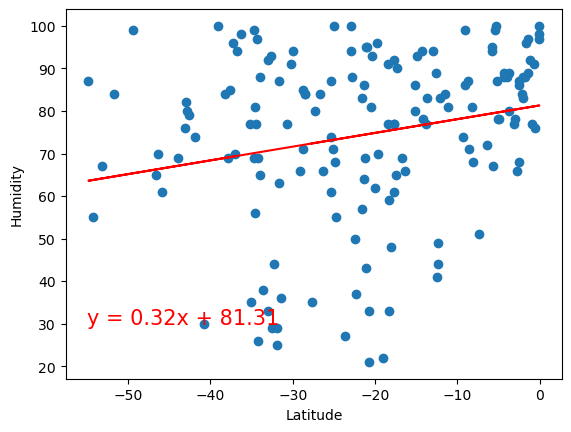

In [18]:
# Linear regression on Northern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Humidity'], 'Humidity', -55, 30)
#other parameters for plot
plt.show()

**Discussion about the linear relationship:** 

The r-value of both sides show that the southern hemisphere is more correlated but only with an r-value of 0.22. This means that the lines do not represent the scatterplot. The dots are too scattered to show an accurate regression line. Latitude number doesn't necessarily affect Humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.015731277033373448


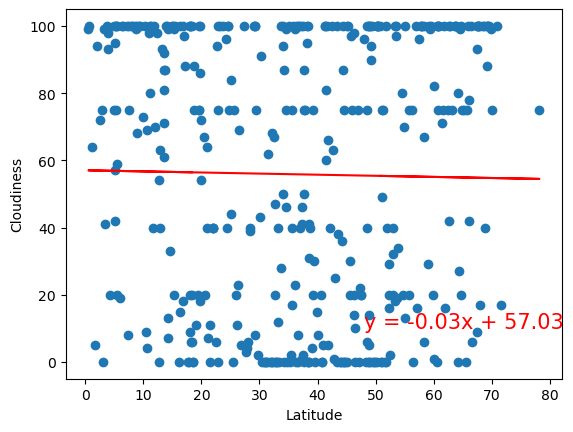

In [19]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'], 'Cloudiness',48,10)
#other parameters for plot
plt.show()

The r-value is: -0.06344949509115787


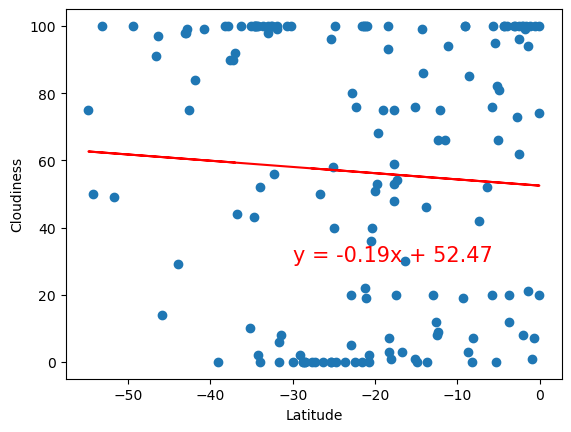

In [20]:
# Linear regression on Northern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'], 'Cloudiness',-30,30)
#other parameters for plot
plt.show()

**Discussion about the linear relationship:** 

Same with the previous graph, the cloudiness of a city is not correlated whatsoever to the latitude. Very spread out in the chart, the r-value would end up between 0.1 to -0.1 which is pretty low for correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.07753923530991934


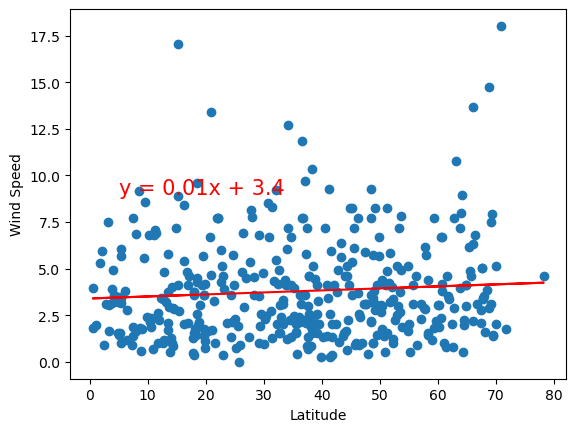

In [21]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'], 'Wind Speed', 5,9)
#other parameters for plot
plt.show()

The r-value is: -0.3285235051530147


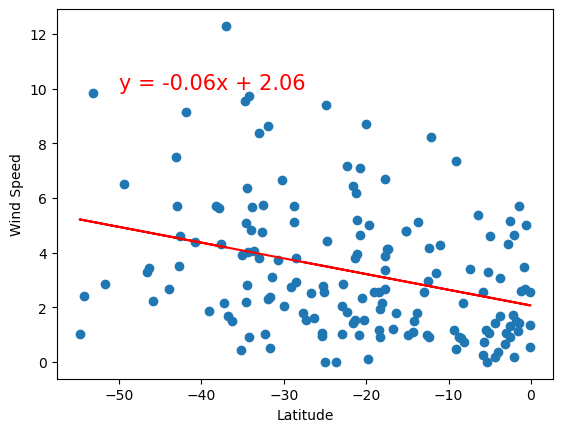

In [22]:
# Linear regression on Northern Hemisphere
linear_regression(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'], 'Wind Speed',-50,10)
#other parameters for plot
plt.show()

**Discussion about the linear relationship:** 

This graph gives an r-value of 0.32 at most, which means its not very correlated. We are sure with this amount of cities that Latitude will never be considered a factor to wind speed.